# DS3000 Final Project Phase 2: Data Acquisition and Preparation

Identify a data source for your data science project. Prepare a 1-2 page document which contains the following:

The name of the data source and a hyperlink to the raw data. Note: Ensure that the data has multiple explanatory variables and a target variable.
Highlight any related work i.e. others who have performed a similar analysis to yours (if applicable).
State any additional resources, including the libraries, that you will use to undertake this project (if applicable).
Perform the initial EDA. Summarize the data preparation steps that are required to prepare your data for analysis. These data preparation steps will be preliminary and you can always revise them later.
Do you notice any patterns and will you evaluate if they are statistically significant?

## Performing Initial EDA

In [62]:
# import libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [63]:
# load the csv
housing_df = pd.read_csv('housing.csv', sep=',', header=0)

### Description of variables in the dataset
- CRIM per capita crime rate by town 
- ZN proportion of residential land zoned for lots over 25,000 sq.ft. 
- INDUS proportion of non-retail business acres per town 
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
- NOX nitric oxides concentration (parts per 10 million) 
- RM average number of rooms per dwelling 
- AGE proportion of owner-occupied units built prior to 1940 
- DIS weighted distances to five Boston employment centres 
- RAD index of accessibility to radial highways 
- TAX full-value property-tax rate per $10,000 
- PTRATIO pupil-teacher ratio by town 
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
- LSTAT % lower status of the population 
- MEDV Median value of owner-occupied homes in $1000's

The target variable is MEDV, and all of the other variables are explanatory variables that we will use to predict the value of a home.

### 1. Find any problems with the data

In [64]:
# view the data
housing_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


There does not appear to be many malformed columns or rows, besides the missing values, which we will handle later.

In [65]:
# find number of missing values
housing_df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [66]:
# find the frequency of missing values in each row
housing_df.isnull().sum(axis=1).sort_values(ascending = False)

355    2
173    2
465    2
350    2
133    2
      ..
179    0
178    0
176    0
175    0
253    0
Length: 506, dtype: int64

There are at most 2 variables with missing data in each row. To handle this, we will simply remove rows with one or more missing variables. This is safe to do because the column with missing values have at most 20 missing values, which is very small compared to the size of the entire dataset.

### 2. Data Preparation

In [67]:
# remove rows with 2 or more missing values
housing_df = housing_df[housing_df.isnull().sum(axis=1) < 1]

The above cell should delete rows with 1 or more missing variables. We can now see the number of missing values from each variable.

In [68]:
# display number of missing values from each variable
housing_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Since our target variable is MEDV, we want to see which variables from the dataset are best for predicting MEDV. In other words, we want to see which variables have the highest correlation with MEDV.

We might do this by graphing every single variable aganst MEDV and seeing which ones have the highest correlation but an alternative method is using a correlation matrix.

This matrix will show the correlation between each variable with each other, but we just need to focus on how each variable correlates with MEDV. To do this, we will use a heatmap from the seaborn library.

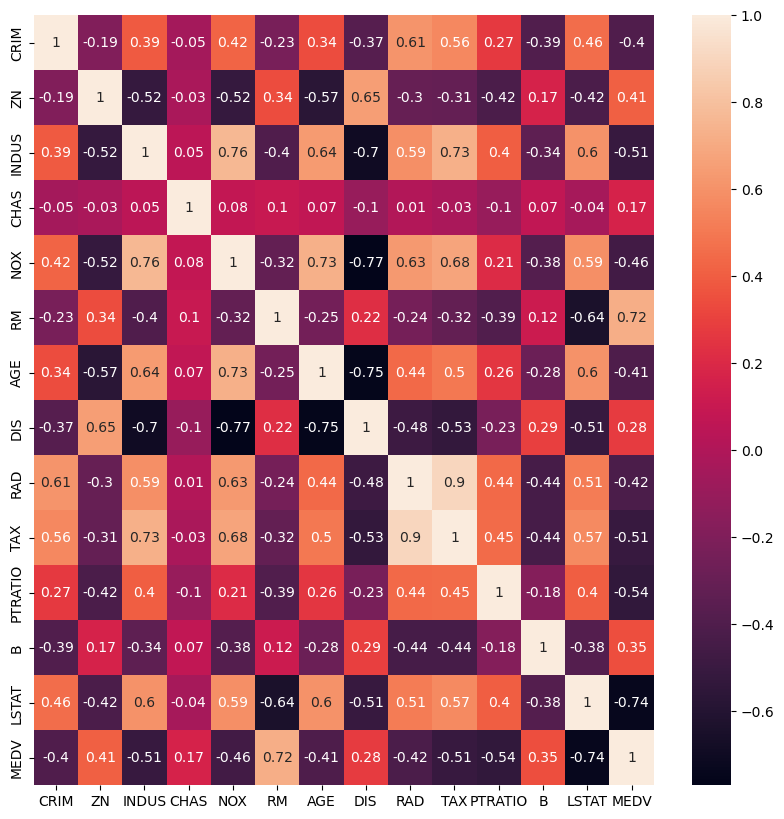

In [72]:
# initialize the correlation matrix
correlation_matrix = housing_df.corr().round(2)

# create a heatmap of the correlation matrix with seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Looking at the correlation matrix, we see that there are two variables that stand out among others in terms of how well they correlate with MEDV. The RM variable has a strong positive correlation with MEDV and LSTAT has a strong negative correlation with MEDV. We can select these two explanatory variables for our model.

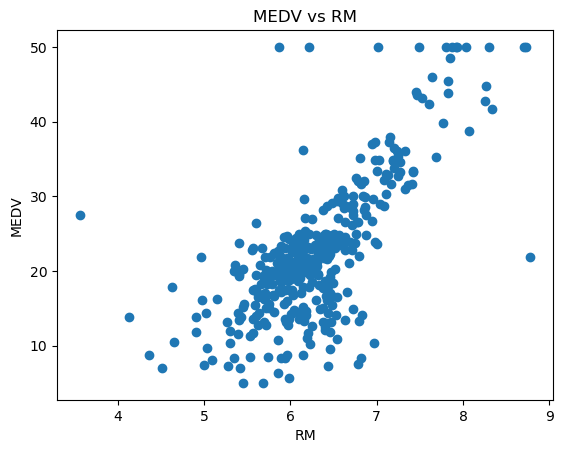

In [74]:
# create a scatter plot of MEDV vs RM
plt.scatter(housing_df['RM'], housing_df['MEDV'])
plt.title('MEDV vs RM')
plt.xlabel('RM')
plt.ylabel('MEDV')

# show the scatter plot
plt.show()

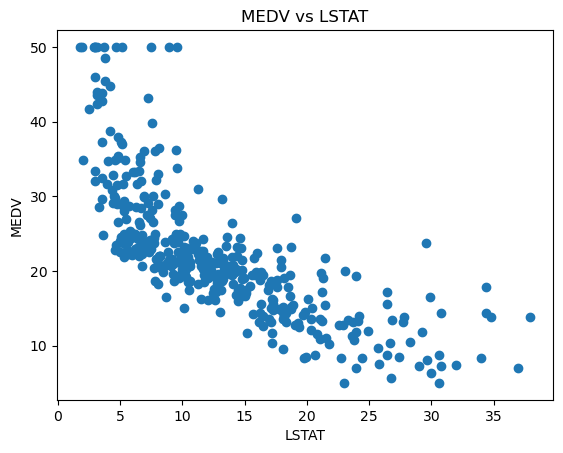

In [75]:
# create a scatter plot of MEDV vs LSTAT
plt.scatter(housing_df['LSTAT'], housing_df['MEDV'])
plt.title('MEDV vs LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

# show the scatter plot
plt.show()

From the graphs above, we can make some observations that expand and confirm what the correlation matrix told us. 

From the first graph, we see that the price tends to increase linearly as RM increases. There are also very few outliers, so this appears to be safe to use to train our model.

From the second graph, we can see that the price tends to decrease as LSTAT increases. It is not a perfectly linear relationship, but very close. There are also few outliers in this graph, so it is likely a good predictor for our model.